# Assignment 7: Movie Recommender

**Objective**: Develop two recommender systems, one based on collaborative filtering using matrix factorization and another based on a content-based approach using multiple features of the data.

## Your major tasks are:
1. Describing the dataset in detail.
2. Preparing dataset ready for the models
3. Training Matrix Factorization as oen methods of Collaborative Filtering
4. Training Content-based model
5. Discuss the result of the models with one or two example of recommendation.

In [1]:
# Import necessary Libraries for dataframes, arrays, and train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")



In [3]:
# Load the data
# ratings_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
# movies_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
ratings_url = 'E:/Nexus/Nexus_Assignments/Assignments/a13/u.data'
movies_url = 'E:/Nexus/Nexus_Assignments/Assignments/a13/u.item'
# remember that you have to search about this famous dataset

ratings = pd.read_csv(ratings_url, sep=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Load the movies data
movies = pd.read_csv(movies_url, sep='|', header=None, encoding='latin-1')

# Define the correct column names (adjust based on actual data format)
movies.columns = ['movie_id', 'title', 'release_date', 'video_release_date',
                  'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                  'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                  'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                  'Thriller', 'War', 'Western']

# Drop unnecessary columns if needed
movies = movies.drop(['video_release_date', 'IMDb_URL'], axis=1)

# Merge datasets
data = pd.merge(ratings, movies, on='movie_id', how='inner')
print(data.shape)

# Train-test split with 80% train share
train_data, test_data = train_test_split(data, test_size=0.2)

# Aggregate the data to avoid duplicates
train_data_grouped = train_data.groupby(['user_id', 'movie_id']).agg({'rating': 'mean'}).reset_index()

# Create the user-item matrix
train_matrix = train_data_grouped.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# For the test matrix, you might need to repeat the same process
test_data_grouped = test_data.groupby(['user_id', 'movie_id']).agg({'rating': 'mean'}).reset_index()
test_matrix = test_data_grouped.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

(100000, 25)


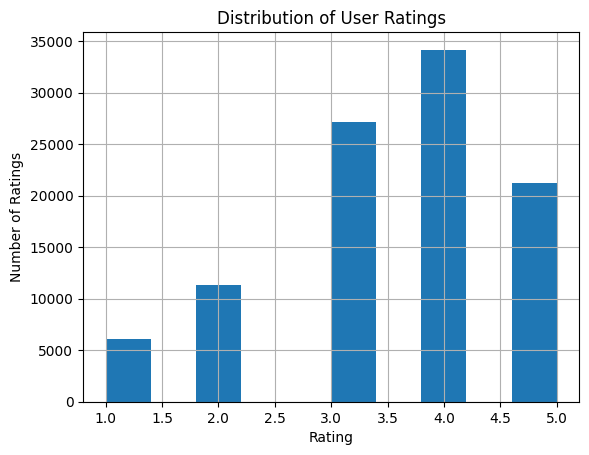

In [4]:
import matplotlib.pyplot as plt

# Example: Distribution of User Ratings
data['rating'].hist(bins=10)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


# you should provide more visualization to illustrate the nature of the dataset

### Matrix Factorization (Collaborative Filtering)

In [5]:
from scipy.sparse.linalg import svds
import numpy as np

# Perform matrix factorization
U, sigma, Vt = svds(train_matrix.values, k=50)

# Predictions
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# you should interpret the result that this model has provided.


### COntent-based Filtering

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming the genre columns start from the 'unknown' column inclusive onwards
print(movies.columns)
genres_matrix = movies.iloc[:, 4:]

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(genres_matrix, genres_matrix)

Index(['movie_id', 'title', 'release_date', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [7]:
def content_based_recommendations(movie_id, cosine_sim=cosine_sim, movies=movies, top_n=10):
    # Find the index of the given movie
    idx = movies.index[movies['movie_id'] == movie_id].tolist()[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top-n most similar movies
    sim_scores = sim_scores[1:top_n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top-n most similar movies
    return movies['title'].iloc[movie_indices]

# Example usage
print(content_based_recommendations(1))


421     Aladdin and the King of Thieves (1996)
94                              Aladdin (1992)
1218                     Goofy Movie, A (1995)
62                    Santa Clause, The (1994)
93                           Home Alone (1990)
101                     Aristocats, The (1970)
137                D3: The Mighty Ducks (1996)
138                       Love Bug, The (1969)
168                 Wrong Trousers, The (1993)
188                    Grand Day Out, A (1992)
Name: title, dtype: object
